# Democracy and Economic Well-Being

## My Research Question & Hypothesis

For this research project I will be exploring what is the relationship between the level of openness of a society and the economic well-being of the citizens. My hypothesis is that countries with a more open society will have a higher level of economic well-being.

## Literature Review

In Why Nations Fail1, Daron Acemoglu and James Robinson explain that economic prosperity depends above all on the inclusiveness of economic and political institutions.  This is in contrast to classical economics which explain the difference in economic well-being using factors like land, labor and capita.  I have previously read this book and hope that my research can confirm or deny their thesis.

John Gerring’s “Democracy and economic growth: A historical perspective” explained that recent studies appear to show that democracy has no robust association with economic growth (economic growth is viewed as the engine to increase economic well-being).  They argue that democracy must be understood as a stock, rather than a level, measure.  Unfortuantely because I only have one year of data I will not be able to address this concern.

## Data Used

The data I will be using is a subset of the Gapminder Project’s data. This section will describe the data in more detail:

### Economic Well-Being
In order to measure the economic well-being I will be using GDP per capita data.  This originally came from the World Bank.  It is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.  The data are in constant 2000 US Dollars.  The GapMinder data set that I will be analyzing is the 2010 GDP per capita.

### Level of Openness
In order to measure the level of openness of a society I will be using the democracy score as a proxy.  The more democratic a society is, the more open it is.  The democracy score comes from the Polity IV project.  It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.  The GapMinder data set that I will analyzing is the polity score for 2009.  To get a feel for this data take a look at the following figure provided by the Polity IV project authors:

![polity categories](http://www.systemicpeace.org/polity/demmap13.jpg)

### Urbanization Rate
The urbanization rate is the urban population as a share of the 2008 total.  The urban population refers to people living in urban areas as defined by national statistical offices.  It is calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects.

## Data Mangement
I begin by importing the libraries needed for the analysis:

In [1]:
%matplotlib inline
# Import libraries needed
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as ssm
import seaborn as sns
import matplotlib.pyplot as plt

Now I have python parse the csv file and print out some basic statistics about the data frame (df):

In [2]:
# Read in the GapMinder Data
print('Reading in GapMinder data')
df = pd.read_csv('gapminder.csv', low_memory=False)
# Print some basic statistics about the GapMinder data
print('Number of observations: '+ str(len(df)) +' (rows)')
print('Number of variables: '+ str(len(df.columns)) +' (columns)')

Reading in GapMinder data
Number of observations: 213 (rows)
Number of variables: 16 (columns)


There are 213 observations with 16 variables in the data frame.  I will change the data type:

In [3]:
# Change the data type for variables of interest
df['polityscore'] = pd.to_numeric(df['polityscore'], errors='coerce')
df['urbanrate'] = pd.to_numeric(df['urbanrate'], errors='coerce')
df['incomeperperson'] = pd.to_numeric(df['incomeperperson'], errors='coerce')

I want to see how many missing observations there are in the variables of interest:

In [4]:
# Print out the counts of valid and missing rows
print ('Countries with a Democracy Score: ' + str(df['polityscore'].count()) + ' out of ' + str(len(df)) + ' (' + str(len(df) - df['polityscore'].count()) + ' missing)')
print ('Countries with an Urbanization Rate: ' + str(df['urbanrate'].count()) + ' out of ' + str(len(df)) + ' (' + str(len(df) - df['urbanrate'].count()) + ' missing)')
print ('Countries with a GDP Per Capita: ' + str(df['incomeperperson'].count()) + ' out of ' + str(len(df)) + ' (' + str(len(df) - df['incomeperperson'].count()) + ' missing)')

Countries with a Democracy Score: 161 out of 213 (52 missing)
Countries with an Urbanization Rate: 203 out of 213 (10 missing)
Countries with a GDP Per Capita: 190 out of 213 (23 missing)


I need to have a set of data with both variables of interest so I will subset the data frame:

In [5]:
# Get the subset of complete data cases
print('Dropping rows with missing urbanization rate, democracy score or per capita GDP')
subset = df[['polityscore','urbanrate','incomeperperson']].dropna()
# Print more statistics
print('Number of observations: '+ str(len(subset)) +' (rows)')

Dropping rows with missing urbanization rate, democracy score or per capita GDP
Number of observations: 155 (rows)


155 of the 213 records have complete data.  Now I will create my new variable for the democracy score categories.  I will do this by defining a function and then using that function to create the new variable:

In [6]:
# This function converts the polity score to a category
def convert_polityscore_to_category(score):
    if score == 10:
        return('1 - Full Democracy')
    elif score > 5:
        return('2 - Democracy')
    elif score > 0:
        return ('3 - Open Anocracy')
    elif score > -6:
        return ('4 - Closed Anocracy')
    else:
        return('5 - Autocracy')

# Now we can use the function to create the new variable
subset['openness'] = subset['polityscore'].apply(convert_polityscore_to_category).astype('category')

I also need to break the data set into three classes of urbanization.  This will be the moderating factor of this analysis:

In [7]:
# Recode urbanization rate
# This function converts the polity score to a category
def convert_urbanrate_to_category(urbanrate):
    if urbanrate < 33:
        return('Not Urban')
    elif urbanrate < 66:
        return('In Transition')
    else:
        return('Urban')

# Now we can use the function to create the new variable
subset['urban'] = subset['urbanrate'].apply(convert_urbanrate_to_category).astype('category')

## ANOVA Tests

Now we are ready to do our ANOVA tests on the data set controlling for the level of urbanization in the country.  Since there are multiple levels I will create a dictionary to hold the data then loop through it.  Here's the data:

In [8]:
datasets = {'Not Urban': subset[subset['urban']=='Not Urban'], 
            'In Transition': subset[subset['urban']=='In Transition'], 
            'Urban' : subset[subset['urban']=='Urban']}

And this is the loop:

ANOVA for Countries Classified as Urban
                            OLS Regression Results                            
Dep. Variable:        incomeperperson   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     8.503
Date:                Thu, 05 Nov 2015   Prob (F-statistic):           2.34e-05
Time:                        16:26:45   Log-Likelihood:                -601.00
No. Observations:                  57   AIC:                             1212.
Df Residuals:                      52   BIC:                             1222.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------

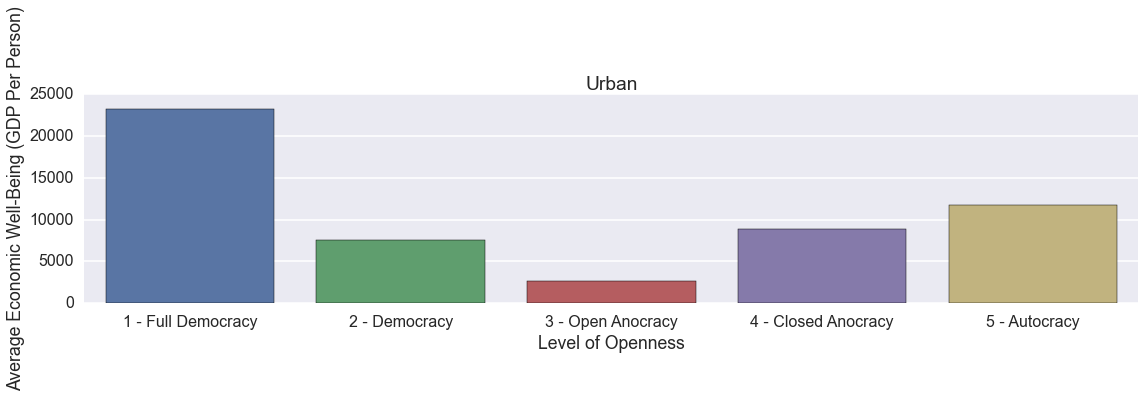

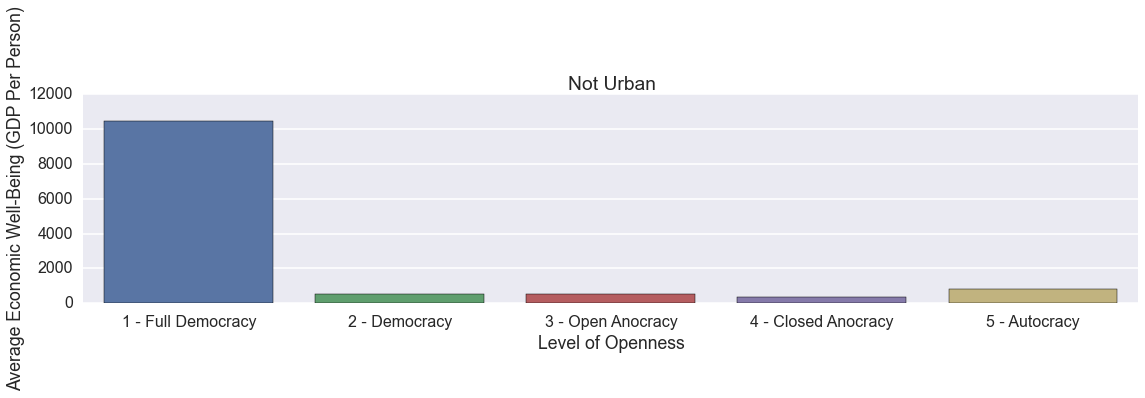

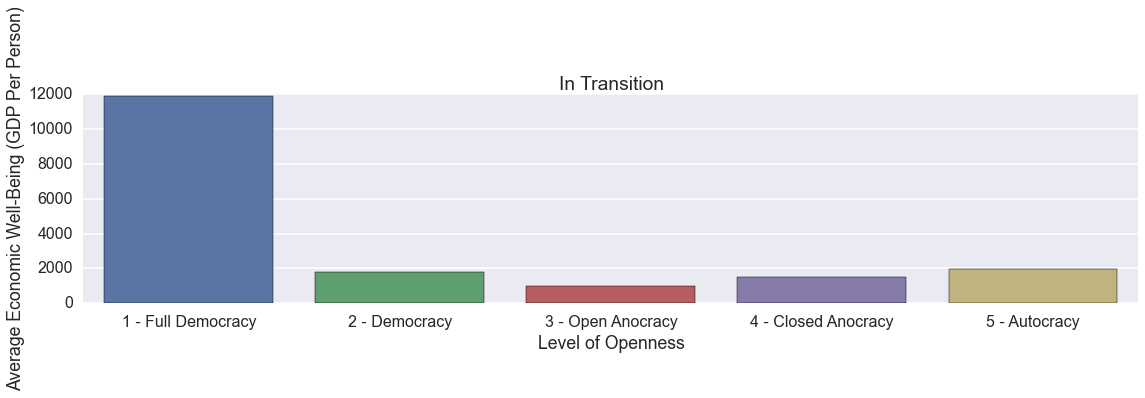

In [9]:
for title, data in datasets.iteritems():
    # ANOVA
    ols_data = data[['incomeperperson','openness']].dropna()
    # Convert float to int
    #ols_data['incomeperperson'] = ols_data['incomeperperson'].astype(int)
    model = smf.ols(formula='incomeperperson ~ C(openness)', data=ols_data).fit()
    print('ANOVA for Countries Classified as '+title)    
    print(model.summary())
    print('\n')
    
    # Tukey Honestly Significantly Different
    tukey = ssm.MultiComparison(data['incomeperperson'], data['openness']).tukeyhsd()
    print('Tukey Honestly Significantly Different Test for Countries Classified as '+title)    
    print(tukey.summary())
    print('\n')
    
    # Economic Well-Being by Level of Openness
    # Visualize Mean Economic Well Being by Level of Openness
    sns.set_context('poster')
    plt.figure(figsize=(14, 7))
    sns.factorplot(x='openness', y='incomeperperson', data=ols_data, kind='bar', ci=None, size=4, aspect=4)
    plt.ylabel('Average Economic Well-Being (GDP Per Person)')
    plt.xlabel('Level of Openness')
    plt.title(title)

## Discussion
In a previous analysis we established the fact that the mean income per person for the countries that are the most open are different from the means of all other groups.  We also observed that the level of urbanization had a positive correlation with economic well-being.  So after controlling for the level of urbanization, the mean income per person for countries that are the most open remain statistically different from the means of all the other groups.